# LeeQ Example notebook

This notebook provides the examples of basic usage of the LeeQ software

## Load the environment

In [1]:
import leeq
from simulated_setup import * # Change to your customized setup file
import numpy as np
from scipy import optimize as so
from leeq.experiments.builtin import *
import plotly.graph_objects as go
from leeq.chronicle import log_and_record, register_browser_function

from leeq.utils.compatibility import *
from leeq.core.elements.built_in.qudit_transmon import TransmonElement
from leeq.experiments.builtin import *

## Initialize qubits configuration

In [2]:
simulation_setup()

# Launch Chronicle viewer for monitoring completed experiments
from leeq.chronicle import Chronicle
chronicle = Chronicle()
chronicle.launch_viewer(port=8051)
print("Chronicle viewer launched at http://localhost:8051")
print("You can monitor completed experiments as they finish.")

# setup().start_live_monitor() # When needed you can setup the live monitor.
setup().status().set_param("Shot_Number", 500)
setup().status().set_param("Shot_Period", 500)                              
  
dut_dict = {
    'Q1': {'Active': True, 'Tuneup': False,'FromLog':False, 'Params': configuration_a},
    'Q2': {'Active': True, 'Tuneup': False,'FromLog':False, 'Params': configuration_b}
}

[2025-08-30 22:50:45] [INFO] [leeq.chronicle.chronicle] Log started at log/coxious/2025-08/2025-08-30/22.50.45


Starting Chronicle Session Viewer on http://127.0.0.1:8051
Monitoring active Chronicle session for completed experiments...
Press Ctrl+C to stop the viewer


Chronicle viewer launched at http://localhost:8051
You can monitor completed experiments as they finish.


/home/coxious/anaconda3/envs/leeq-nvidia/lib/python3.10/site-packages/plotly/matplotlylib/renderer.py:645: UserWarning:

Looks like the annotation(s) you are trying 
to draw lies/lay outside the given figure size.

Therefore, the resulting Plotly figure may not be 
large enough to view the full text. To adjust 
the size of the figure, use the 'width' and 
'height' keys in the Layout object. Alternatively,
use the Margin object to adjust the figure's margins.

/home/coxious/anaconda3/envs/leeq-nvidia/lib/python3.10/site-packages/plotly/matplotlylib/renderer.py:571: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates



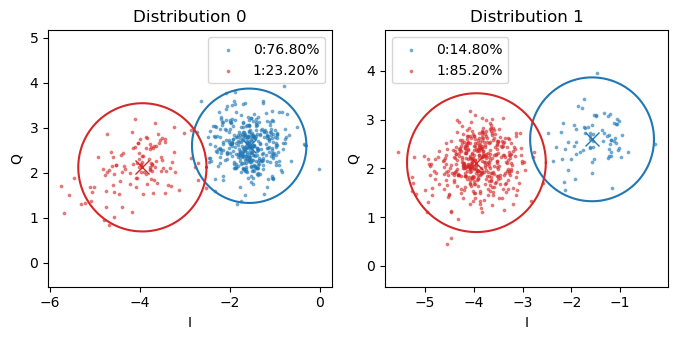

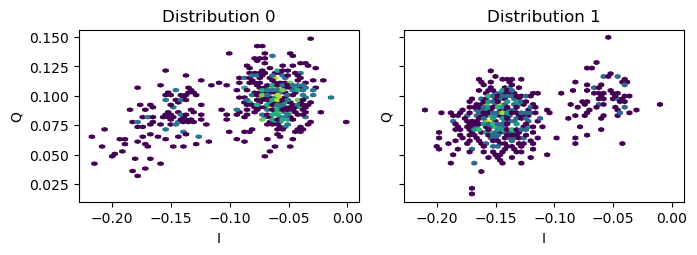

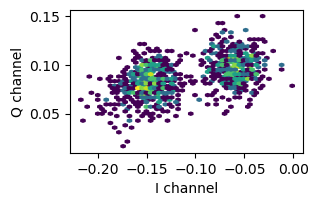

<IPython.core.display.JSON object>

<IPython.core.display.JSON object>

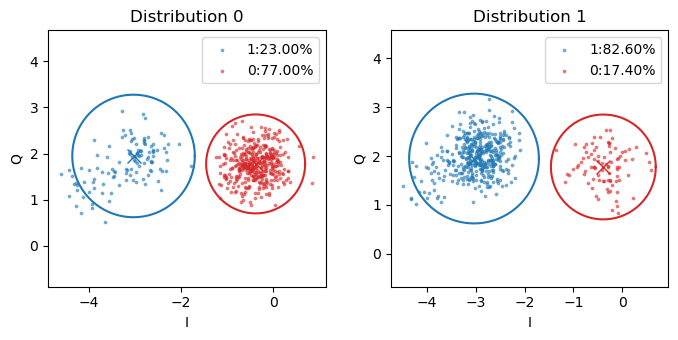

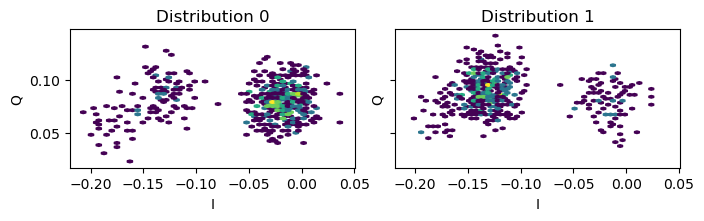

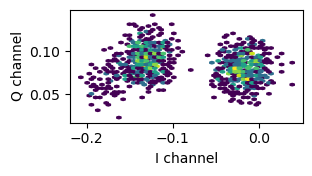

<IPython.core.display.JSON object>

<IPython.core.display.JSON object>

In [3]:
duts_dict = {}
for hrid, dd in dut_dict.items():
    if (dd['Active']):
        if (dd['FromLog']):
            dut = TransmonElement.load_from_calibration_log(dd['Params']['hrid'])
        else:
            dut = TransmonElement(name=dd['Params']['hrid'],parameters=dd['Params'])
            
        if (dd['Tuneup']):
            dut.save_calibration_log()
        else:
            lpb_scan = (dut.get_c1('f01')['I'], dut.get_c1('f01')['X'])
            calib = MeasurementCalibrationMultilevelGMM(dut, mprim_index=0,sweep_lpb_list=lpb_scan)
        dut.print_config_info()
        duts_dict[hrid] = dut

dut = None

# Resonators Spectroscopy

In [4]:
dut = duts_dict['Q1']                                # device under test (qubit and resonator pair)
mprim = dut.get_measurement_prim_intlist(0)         # resonator measurement params
c1 = dut.get_c1('f01')                              # qubit pulse collection

ResonatorSweepTransmissionWithExtraInitialLPB(dut,
            start = 9645-10,
            stop  = 9645+10,
            step = 0.5,
            num_avs = 10000,
            rep_rate = 0.0,
            mp_width = 8,
            amp=0.03
)

<IPython.core.display.JSON object>

<Experiment: ResonatorSweepTransmissionWithExtraInitialLPB>

## Qubits Tuneup

### Calibrate single qubit pulse amplitute

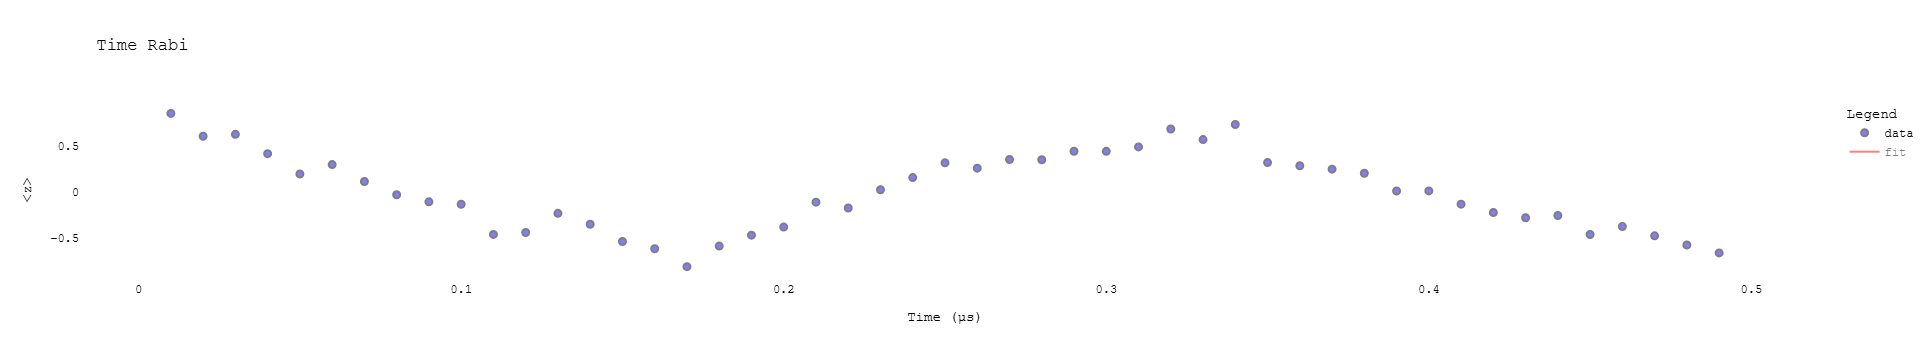

<IPython.core.display.JSON object>

In [5]:
rabi = NormalisedRabi(dut_qubit=dut,step=0.01,stop=0.5, amp=0.19905818643939352,update=True)

### Calibrate single qubit gate frequency then amplitute again

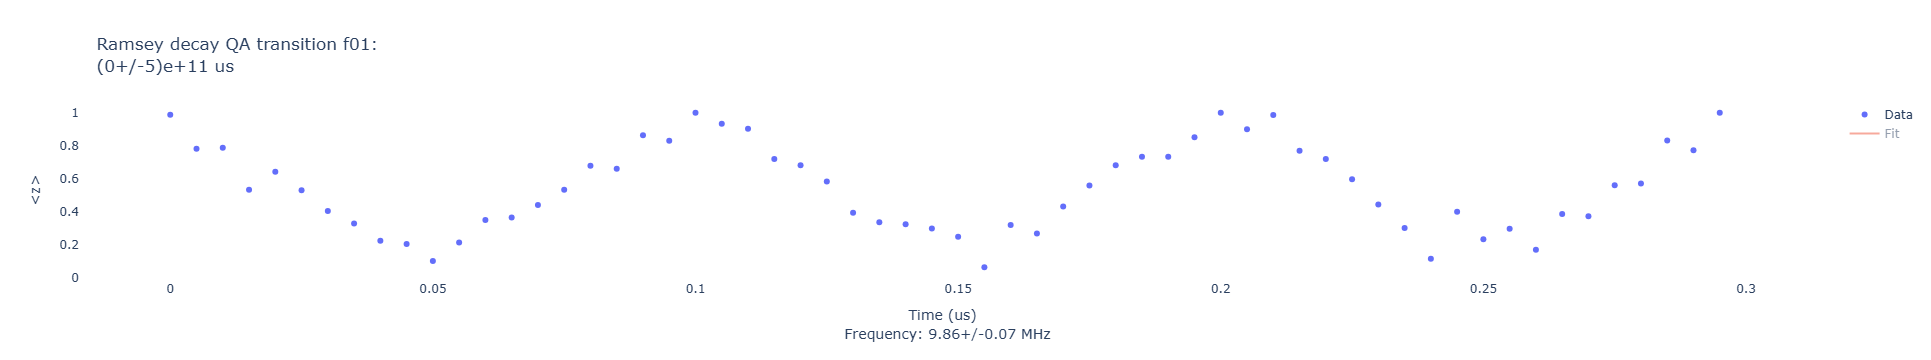

<IPython.core.display.JSON object>

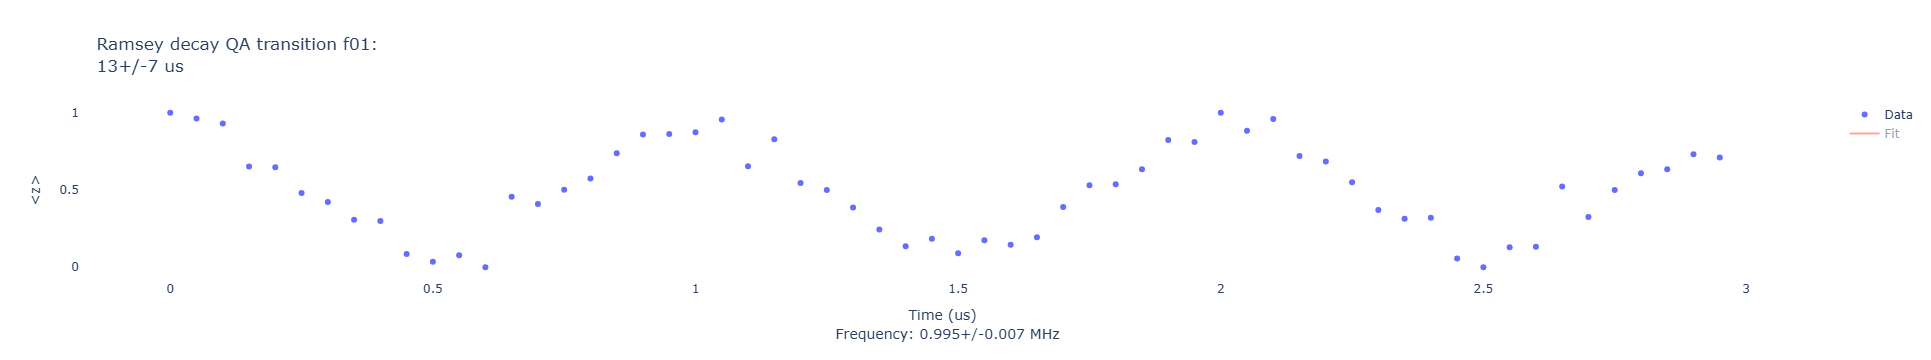

<IPython.core.display.JSON object>

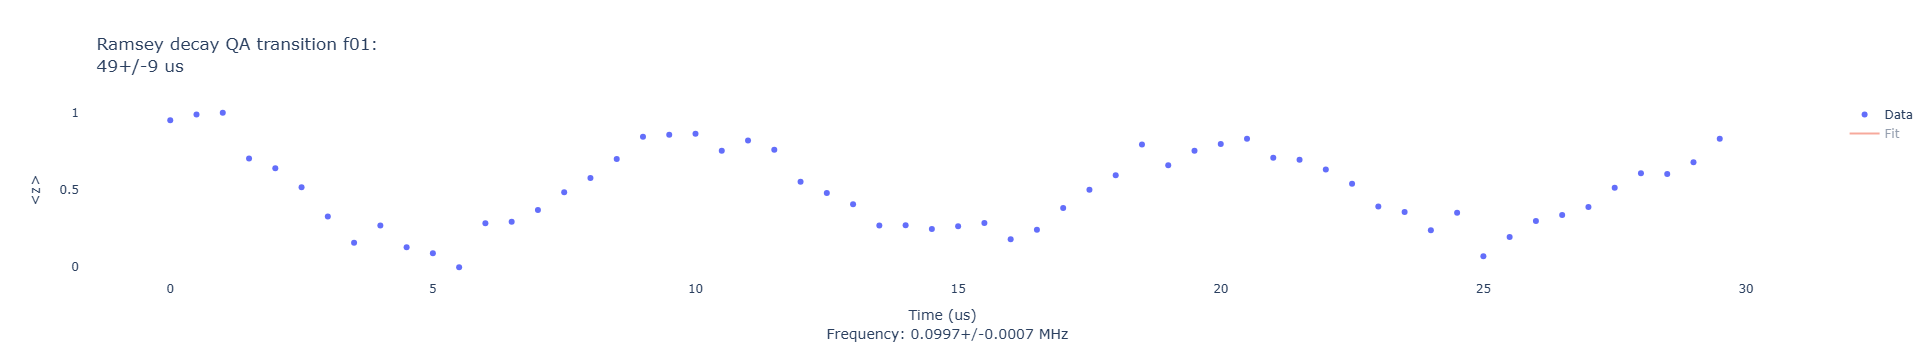

<IPython.core.display.JSON object>

In [6]:
# Ramsey
ramsey = SimpleRamseyMultilevel(dut=dut,set_offset=10,stop=0.3,step=0.005)
ramsey = SimpleRamseyMultilevel(dut=dut,set_offset=1,stop=3,step=0.05)
ramsey = SimpleRamseyMultilevel(dut=dut,set_offset=0.1,stop=30,step=0.5)
    

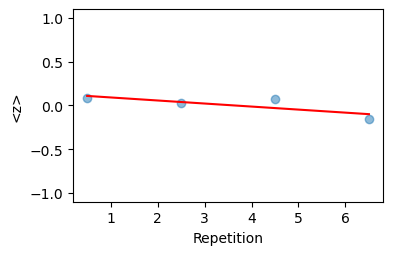

<IPython.core.display.JSON object>

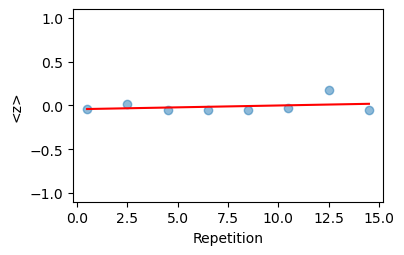

<IPython.core.display.JSON object>

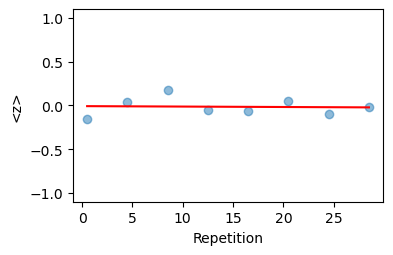

<IPython.core.display.JSON object>

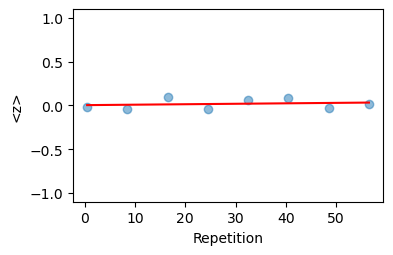

<IPython.core.display.JSON object>

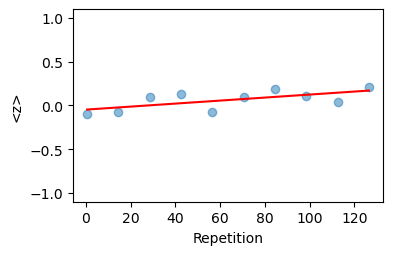

<IPython.core.display.JSON object>

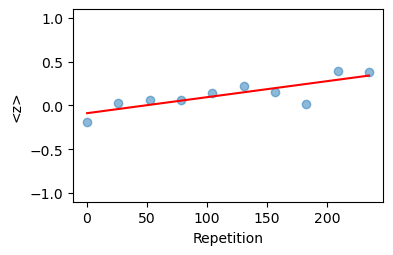

<IPython.core.display.JSON object>

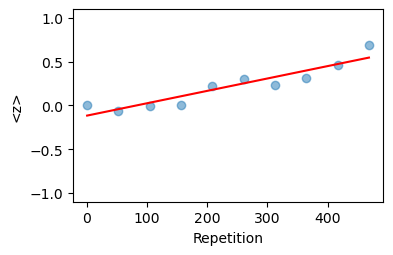

<IPython.core.display.JSON object>

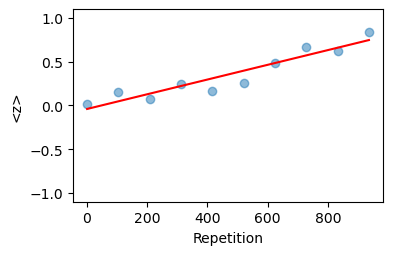

<IPython.core.display.JSON object>

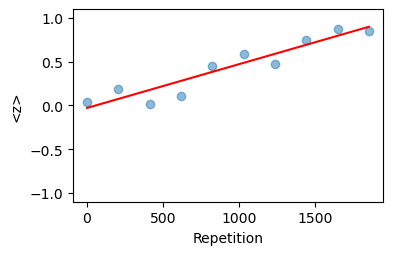

<IPython.core.display.JSON object>

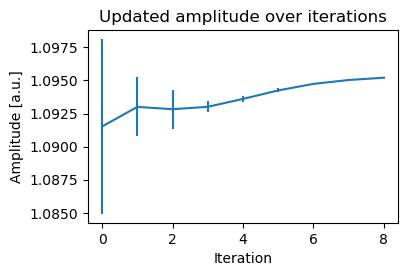

<IPython.core.display.JSON object>

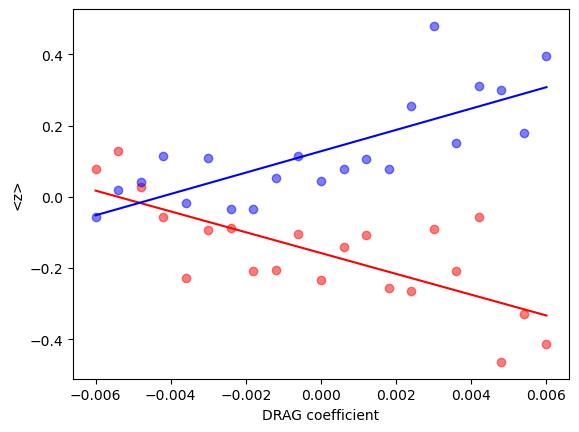

<IPython.core.display.JSON object>

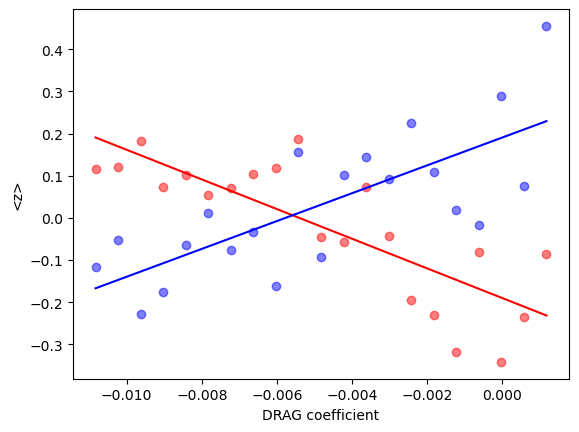

<IPython.core.display.JSON object>

<IPython.core.display.JSON object>

In [7]:
# pingpong
pingpong = AmpPingpongCalibrationSingleQubitMultilevel(
        dut = dut
    )
    
# Drag
drag = CrossAllXYDragMultiRunSingleQubitMultilevel(
        dut = dut
    )

### Coherence (T1 T2 echo T2 ramsey)

In [8]:
SimpleT1(qubit=duts_dict['Q1'],time_length=300,time_resolution=5)


<IPython.core.display.JSON object>

<Experiment: SimpleT1>

In [9]:
echo = SpinEchoMultiLevel(dut=duts_dict['Q1'],free_evolution_time=200,time_resolution=5)


<IPython.core.display.JSON object>

In [10]:
echo.plot_echo()

In [11]:
ramsey = SimpleRamseyMultilevel(
    dut=duts_dict['Q1'],
    stop=50,
    step=0.25,
    set_offset=0.2
)

<IPython.core.display.JSON object>